In [1]:
# File processing 
import os

# Data processing 
import numpy as np
from numpy import linalg as LAnumpy

# Data display 
import matplotlib
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from matplotlib.legend_handler import HandlerLine2D

# Constants

In [2]:
EMBEDDING_SIZE = 3
TRUSSART_STRUCTURES_PATH = '../../data/trussart/structure_matrices/'

# Seeds

# Structure analysis functions

In [3]:
def centralize_numpy(z):
    return z - np.mean(z, axis=0)

In [4]:
def normalize_numpy(z):
    
    norm = LAnumpy.norm(z, 2, axis=1)
    max_norm = np.max(norm, axis=0)
    if max_norm == 0:
        max_norm = 1
    
    return z / max_norm

In [5]:
def centralize_and_normalize_numpy(z):
    
    # Translate
    z = centralize_numpy(z)
    
    # Scale
    z = normalize_numpy(z)
    
    return z

In [6]:
def kabsch_superimposition_numpy(pred_structure, true_structure):
    
    # Centralize and normalize to unit ball
    pred_structure_unit_ball = centralize_and_normalize_numpy(pred_structure)
    true_structure_unit_ball = centralize_and_normalize_numpy(true_structure)
    
    # Rotation (solution for the constrained orthogonal Procrustes problem, subject to det(R) = 1)
    m = np.matmul(np.transpose(true_structure_unit_ball), pred_structure_unit_ball)
    u, s, vh = np.linalg.svd(m)
    
    d = np.sign(np.linalg.det(np.matmul(u, vh)))
    a = np.eye(EMBEDDING_SIZE)
    a[-1,-1] = d
    
    r = np.matmul(np.matmul(u, a), vh)
    
    pred_structure_unit_ball = np.transpose(np.matmul(r, np.transpose(pred_structure_unit_ball)))
    
    return pred_structure_unit_ball, true_structure_unit_ball

In [7]:
def kabsch_distance_numpy(pred_structure, true_structure):
    
    pred_structure_unit_ball, true_structure_unit_ball = kabsch_superimposition_numpy(pred_structure, true_structure)
    
    # Structure comparison
    d = np.mean(np.sum(np.square(pred_structure_unit_ball - true_structure_unit_ball), axis=1))
    
    return d

# Load Trussart losse results

# Minimds

In [8]:
minimds_structure_50 = np.loadtxt('experiment_results/minimds/trussart_structure_formatted_50.txt')
minimds_structure_100 = np.loadtxt('experiment_results/minimds/trussart_structure_formatted_100.txt')
minimds_structure_150 = np.loadtxt('experiment_results/minimds/trussart_structure_formatted_150.txt')
minimds_structure_200 = np.loadtxt('experiment_results/minimds/trussart_structure_formatted_200.txt')

Trussart structure matrices (to compute the Minimds losses):

In [9]:
trussart_structures = []

file_list = os.listdir(TRUSSART_STRUCTURES_PATH)
file_list = filter(lambda f: f.endswith('.xyz'), file_list)

for file_name in file_list:
    current_trussart_structure = np.loadtxt(TRUSSART_STRUCTURES_PATH + file_name, dtype='f', delimiter='\t')
    current_trussart_structure = current_trussart_structure[:,1:]
    current_trussart_structure = centralize_and_normalize_numpy(current_trussart_structure)
    trussart_structures.append(current_trussart_structure)
    
trussart_structures = np.asarray(trussart_structures)

Now compute the Minimds losses:

In [10]:
def compute_trussart_loss(structure):
    kabsch_distances = []
    for true_structure in trussart_structures:
        kabsch_distances.append(kabsch_distance_numpy(structure, true_structure))

    return np.mean(kabsch_distances)

In [11]:
minimds_50 = compute_trussart_loss(minimds_structure_50)
minimds_100 = compute_trussart_loss(minimds_structure_100)
minimds_150 = compute_trussart_loss(minimds_structure_150)
minimds_200 = compute_trussart_loss(minimds_structure_200)

# GEM

In [12]:
gem_structure_50 = np.loadtxt('experiment_results/gem/trussart_structure_formatted_50.txt')
gem_structure_100 = np.loadtxt('experiment_results/gem/trussart_structure_formatted_100.txt')
gem_structure_150 = np.loadtxt('experiment_results/gem/trussart_structure_formatted_150.txt')
gem_structure_200 = np.loadtxt('experiment_results/gem/trussart_structure_formatted_200.txt')

Compute the GEM losses:

In [13]:
gem_50 = compute_trussart_loss(gem_structure_50)
gem_100 = compute_trussart_loss(gem_structure_100)
gem_150 = compute_trussart_loss(gem_structure_150)
gem_200 = compute_trussart_loss(gem_structure_200)

## REACH-3D

In [14]:
reach3d_50 = np.loadtxt('experiment_results/reach3d/reach3d_trussart_test_structure_losses_all_epochs_50.txt')
reach3d_100 = np.loadtxt('experiment_results/reach3d/reach3d_trussart_test_structure_losses_all_epochs_100.txt')
reach3d_150 = np.loadtxt('experiment_results/reach3d/reach3d_trussart_test_structure_losses_all_epochs_150.txt')
reach3d_200 = np.loadtxt('experiment_results/reach3d/reach3d_trussart_test_structure_losses_all_epochs_200.txt')

## tREACH-3D

### Synthetic Random

#### Linear

In [15]:
linear_50 = np.loadtxt('experiment_results/linear/non_ae_synthetic_random_linear_trussart_test_kabsch_losses_all_epochs_50_0.1.txt')
linear_100 = np.loadtxt('experiment_results/linear/non_ae_synthetic_random_linear_trussart_test_kabsch_losses_all_epochs_100_0.1.txt')
linear_150 = np.loadtxt('experiment_results/linear/non_ae_synthetic_random_linear_trussart_test_kabsch_losses_all_epochs_150_0.1.txt')
linear_200 = np.loadtxt('experiment_results/linear/non_ae_synthetic_random_linear_trussart_test_kabsch_losses_all_epochs_200_0.1.txt')

In [16]:
linear_structure_50 = np.loadtxt('experiment_results/linear/non_ae_synthetic_random_linear_trussart_test_structure_50_special.txt')
linear_structure_100 = np.loadtxt('experiment_results/linear/non_ae_synthetic_random_linear_trussart_test_structure_100_special.txt')
linear_structure_150 = np.loadtxt('experiment_results/linear/non_ae_synthetic_random_linear_trussart_test_structure_150_special.txt')
linear_structure_200 = np.loadtxt('experiment_results/linear/non_ae_synthetic_random_linear_trussart_test_structure_200_special.txt')

#### Bi-LSTM

In [17]:
# bi_lstm_50 = np.loadtxt('experiment_results/bi_lstm/non_ae_synthetic_random_bi_lstm_trussart_test_kabsch_losses_all_epochs_50_0.1.txt')
# bi_lstm_100 = np.loadtxt('experiment_results/bi_lstm/non_ae_synthetic_random_bi_lstm_trussart_test_kabsch_losses_all_epochs_100_0.1.txt')
# bi_lstm_150 = np.loadtxt('experiment_results/bi_lstm/non_ae_synthetic_random_bi_lstm_trussart_test_kabsch_losses_all_epochs_150_0.1.txt')
# bi_lstm_200 = np.loadtxt('experiment_results/bi_lstm/non_ae_synthetic_random_bi_lstm_trussart_test_kabsch_losses_all_epochs_200_0.1.txt')

# Display Structure

In [18]:
perfect_structure = np.mean(trussart_structures, axis=0)

In [19]:
display_structure, _ = kabsch_superimposition_numpy(linear_structure_50, perfect_structure)

In [45]:
display_structure = trussart_structures[99]

In [46]:
# Initialize figure with 3D subplots
fig = make_subplots(
    rows=1, cols=1,
    specs=[[{'type': 'scatter3d'}]])

# adding surfaces to subplots.
fig.add_trace(
    go.Scatter3d(
    x=display_structure[:,0], y=display_structure[:,1], z=display_structure[:,2], opacity=0.7,
    marker=dict(
        size=6,
        color=np.asarray(range(len(display_structure[:,0]))),
        colorscale='Viridis',
        line=dict(width=3)
    ),
    line=dict(
        color='darkblue',
        width=2
    )
), row=1, col=1)

fig.update_layout(
    height=1000,
    width=1000
)

fig.show()

# Plot

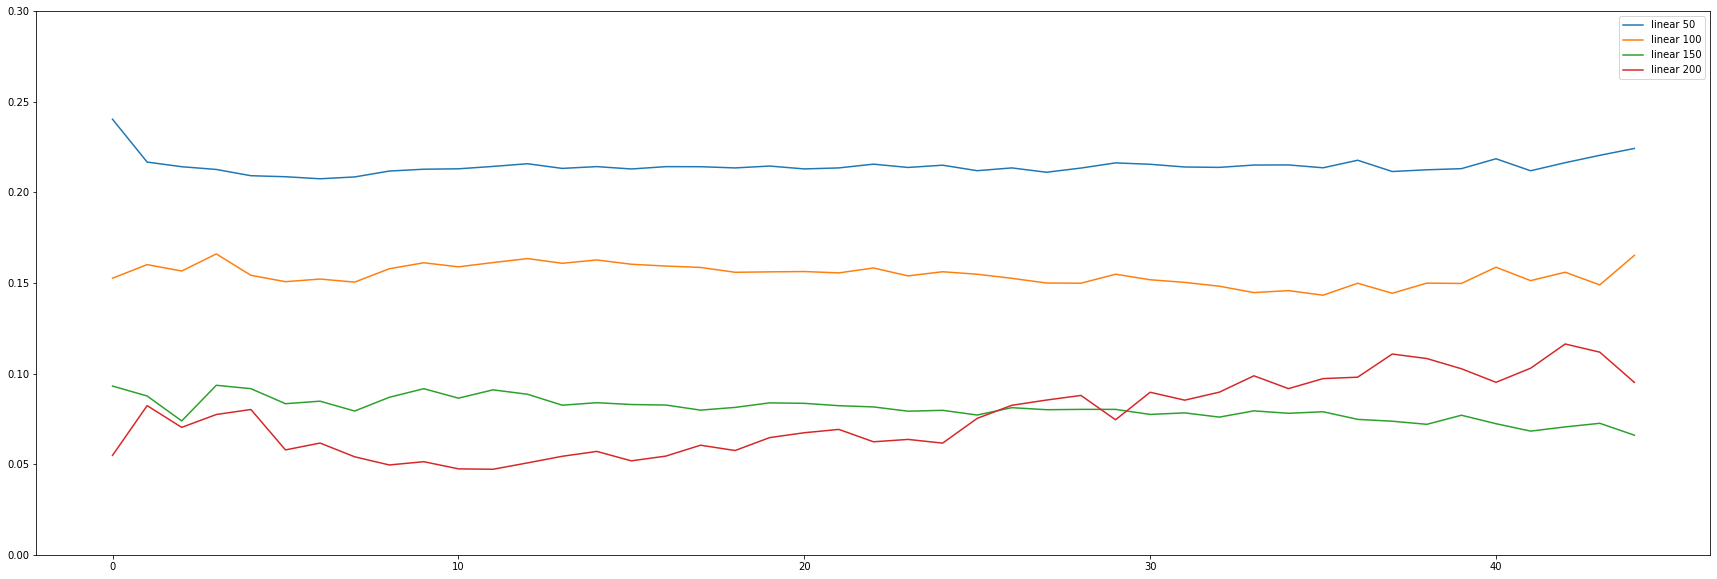

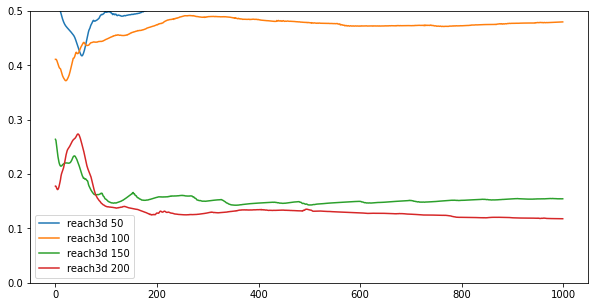

In [21]:
fig, axs = plt.subplots(1, 1, figsize=(30, 10))

axs.plot(linear_50, label='linear 50')
axs.plot(linear_100, label='linear 100')
axs.plot(linear_150, label='linear 150')
axs.plot(linear_200, label='linear 200')
axs.set_ylim(0, 0.30)
axs.legend()

plt.show()

fig, axs = plt.subplots(1, 1, figsize=(10, 5))

axs.plot(reach3d_50, label='reach3d 50')
axs.plot(reach3d_100, label='reach3d 100')
axs.plot(reach3d_150, label='reach3d 150')
axs.plot(reach3d_200, label='reach3d 200')
axs.set_ylim(0, 0.50)
axs.legend()

plt.show()

In [22]:
# minimds = [minimds_50, minimds_100, minimds_150, minimds_200]
# gem = [gem_50, gem_100, gem_150, gem_200]
reach3d = [np.min(reach3d_50), np.min(reach3d_100), np.min(reach3d_150), np.min(reach3d_200)]
treach3d_linear = [np.min(linear_50), np.min(linear_100), np.min(linear_150), np.min(linear_200)]
# treach3d_bi_lstm = [np.min(bi_lstm_50), np.min(bi_lstm_100), np.min(bi_lstm_150), np.min(bi_lstm_200)]

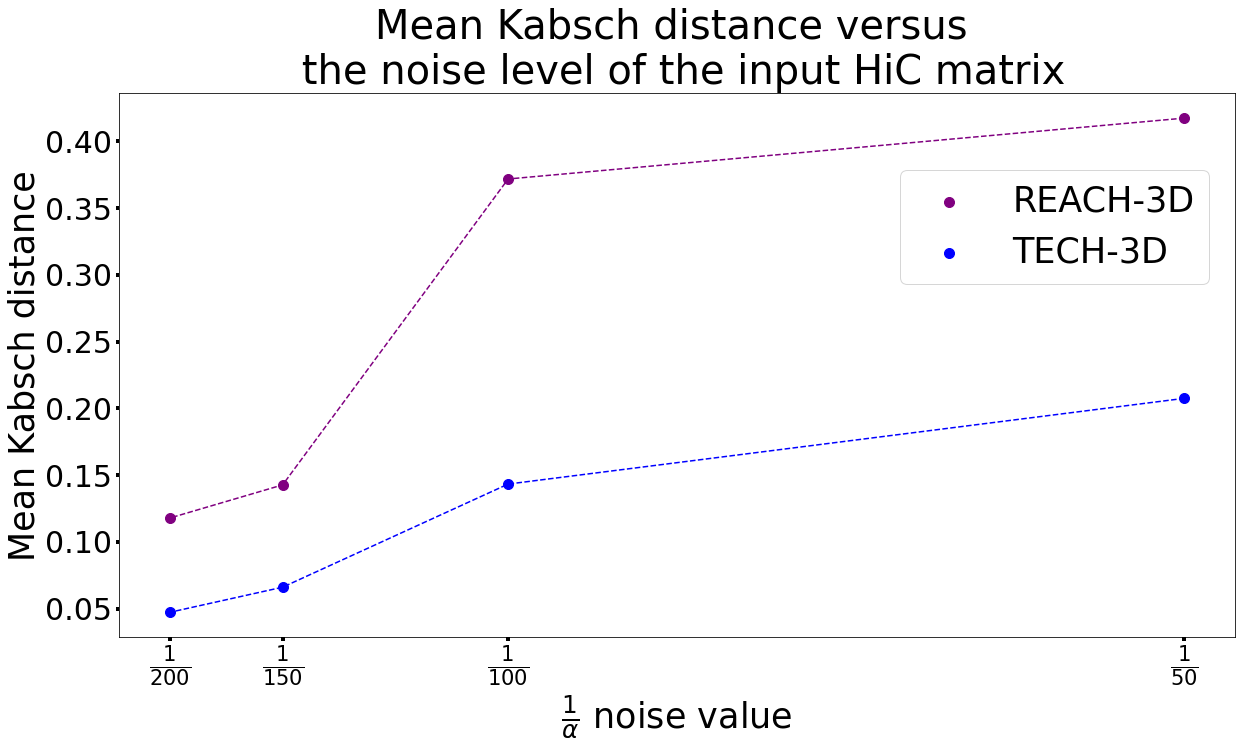

In [23]:
fig, axs = plt.subplots(1, 1, figsize=(20,10))
x_axis = [1/50, 1/100, 1/150, 1/200]

axs.scatter(x_axis, reach3d, label='REACH-3D', s=100, color='purple')
axs.plot(x_axis, reach3d, linestyle='dashed', color='purple')
axs.scatter(x_axis, treach3d_linear, label='TECH-3D', s=100, color='blue')
axs.plot(x_axis, treach3d_linear, linestyle='dashed', color='blue')

axs.set_xticks([1/50, 1/100, 1/150, 1/200])
axs.set_xticklabels([r'$\frac{1}{50}$', r'$\frac{1}{100}$', r'$\frac{1}{150}$', r'$\frac{1}{200}$'])

axs.tick_params(axis='both', which='major', labelsize=30, width=4)

axs.set_title('Mean Kabsch distance versus \n the noise level of the input HiC matrix', size=40)
axs.set_xlabel(r'$\frac{1}{\alpha}$ noise value', fontsize = 35)
axs.set_ylabel('Mean Kabsch distance', fontsize = 35)

plt.legend(fontsize=35, loc=(0.70, 0.65))

plt.savefig('mean_kabsch_distance_versus_noise_level_trussart.png')
plt.show()